<big>OIBSIP Task 1- Iris Flower Classification</big> 

Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Getting Data

In [2]:
data = pd.read_csv("Iris.csv")
data = pd.DataFrame(data)
temp_data = data

In [3]:
# Getting the first 5 rows of the data
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Data shape 
data.shape

(150, 6)

In [5]:
# Column Names
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
# Basic information of the dataset
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
# Checking for null values
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
# Get the data types of all the columns
data.dtypes 

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

Analysis of the output column -> 'Species'

In [9]:
data['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x24209ce0550>,
 [Text(0.5499999702695115, 0.9526279613277875, 'Iris-setosa'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'Iris-versicolor'),
  Text(0.5500001486524352, -0.9526278583383436, 'Iris-virginica')],
 [Text(0.2999999837833699, 0.5196152516333385, '33.3%'),
  Text(-0.5999999999999974, -5.6176054134900006e-08, '33.3%'),
  Text(0.30000008108314646, -0.5196151954572783, '33.3%')])

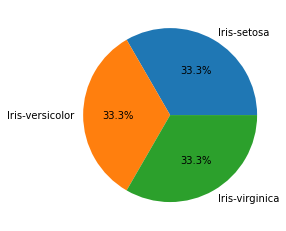

In [10]:
# Pie chart of the Species distribution
labels = data['Species'].unique()
freq = data['Species'].value_counts()

plt.pie(freq, labels=labels, autopct='%1.1f%%')

Analysis of the input data -> 'SepalLengthCm' 'SepalWidthCm' 'PetalLengthCm' 'PetalWidthCm'

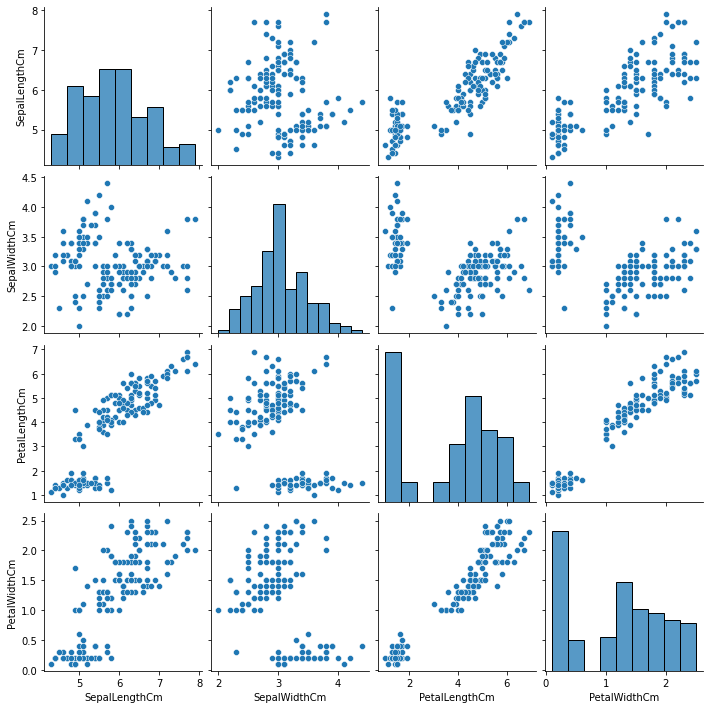

In [11]:
# Getting the pairplots of all the columns with every other column
data = data.drop(['Id'], axis=1)
sns.pairplot(data)

Data Preprocessing

In [12]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

LabelEnoding

In [13]:
le = preprocessing.LabelEncoder()
data['Species'] = le.fit_transform(data['Species'])

In [14]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
# Getting the numerical representation of each output
print(data['Species'][0])
print(temp_data['Species'][0])
print('\n')
print(data['Species'][70])
print(temp_data['Species'][70])
print('\n')
print(data['Species'][149])
print(temp_data['Species'][149])

0
Iris-setosa


1
Iris-versicolor


2
Iris-virginica


0->Iris-setosa;
1->Iris-versicolor;
2->Iris-virginica;

Train-test split

In [16]:
# Splitting the data into training and testing data, the size of the test set will be 0.2 * 150 = 30, remaining data should be training
X = data.drop(['Species'], axis=1)
y = data['Species']
X_train, X_test, y_train ,y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

Making the model

In [17]:
# Create a Random Forest Classifier object
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=2)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=2)

Making predictions

In [18]:
# Making predictions on the test data
y_pred = rf_classifier.predict(X_test)
y_pred

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 0, 2, 0, 2])

In [19]:
# Evaluating the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 96.66666666666667
